In [10]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt

File = "./TSM.csv"
shit = pd.read_csv(File)

In [11]:
shit.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Populating the interactive namespace from numpy and matplotlib


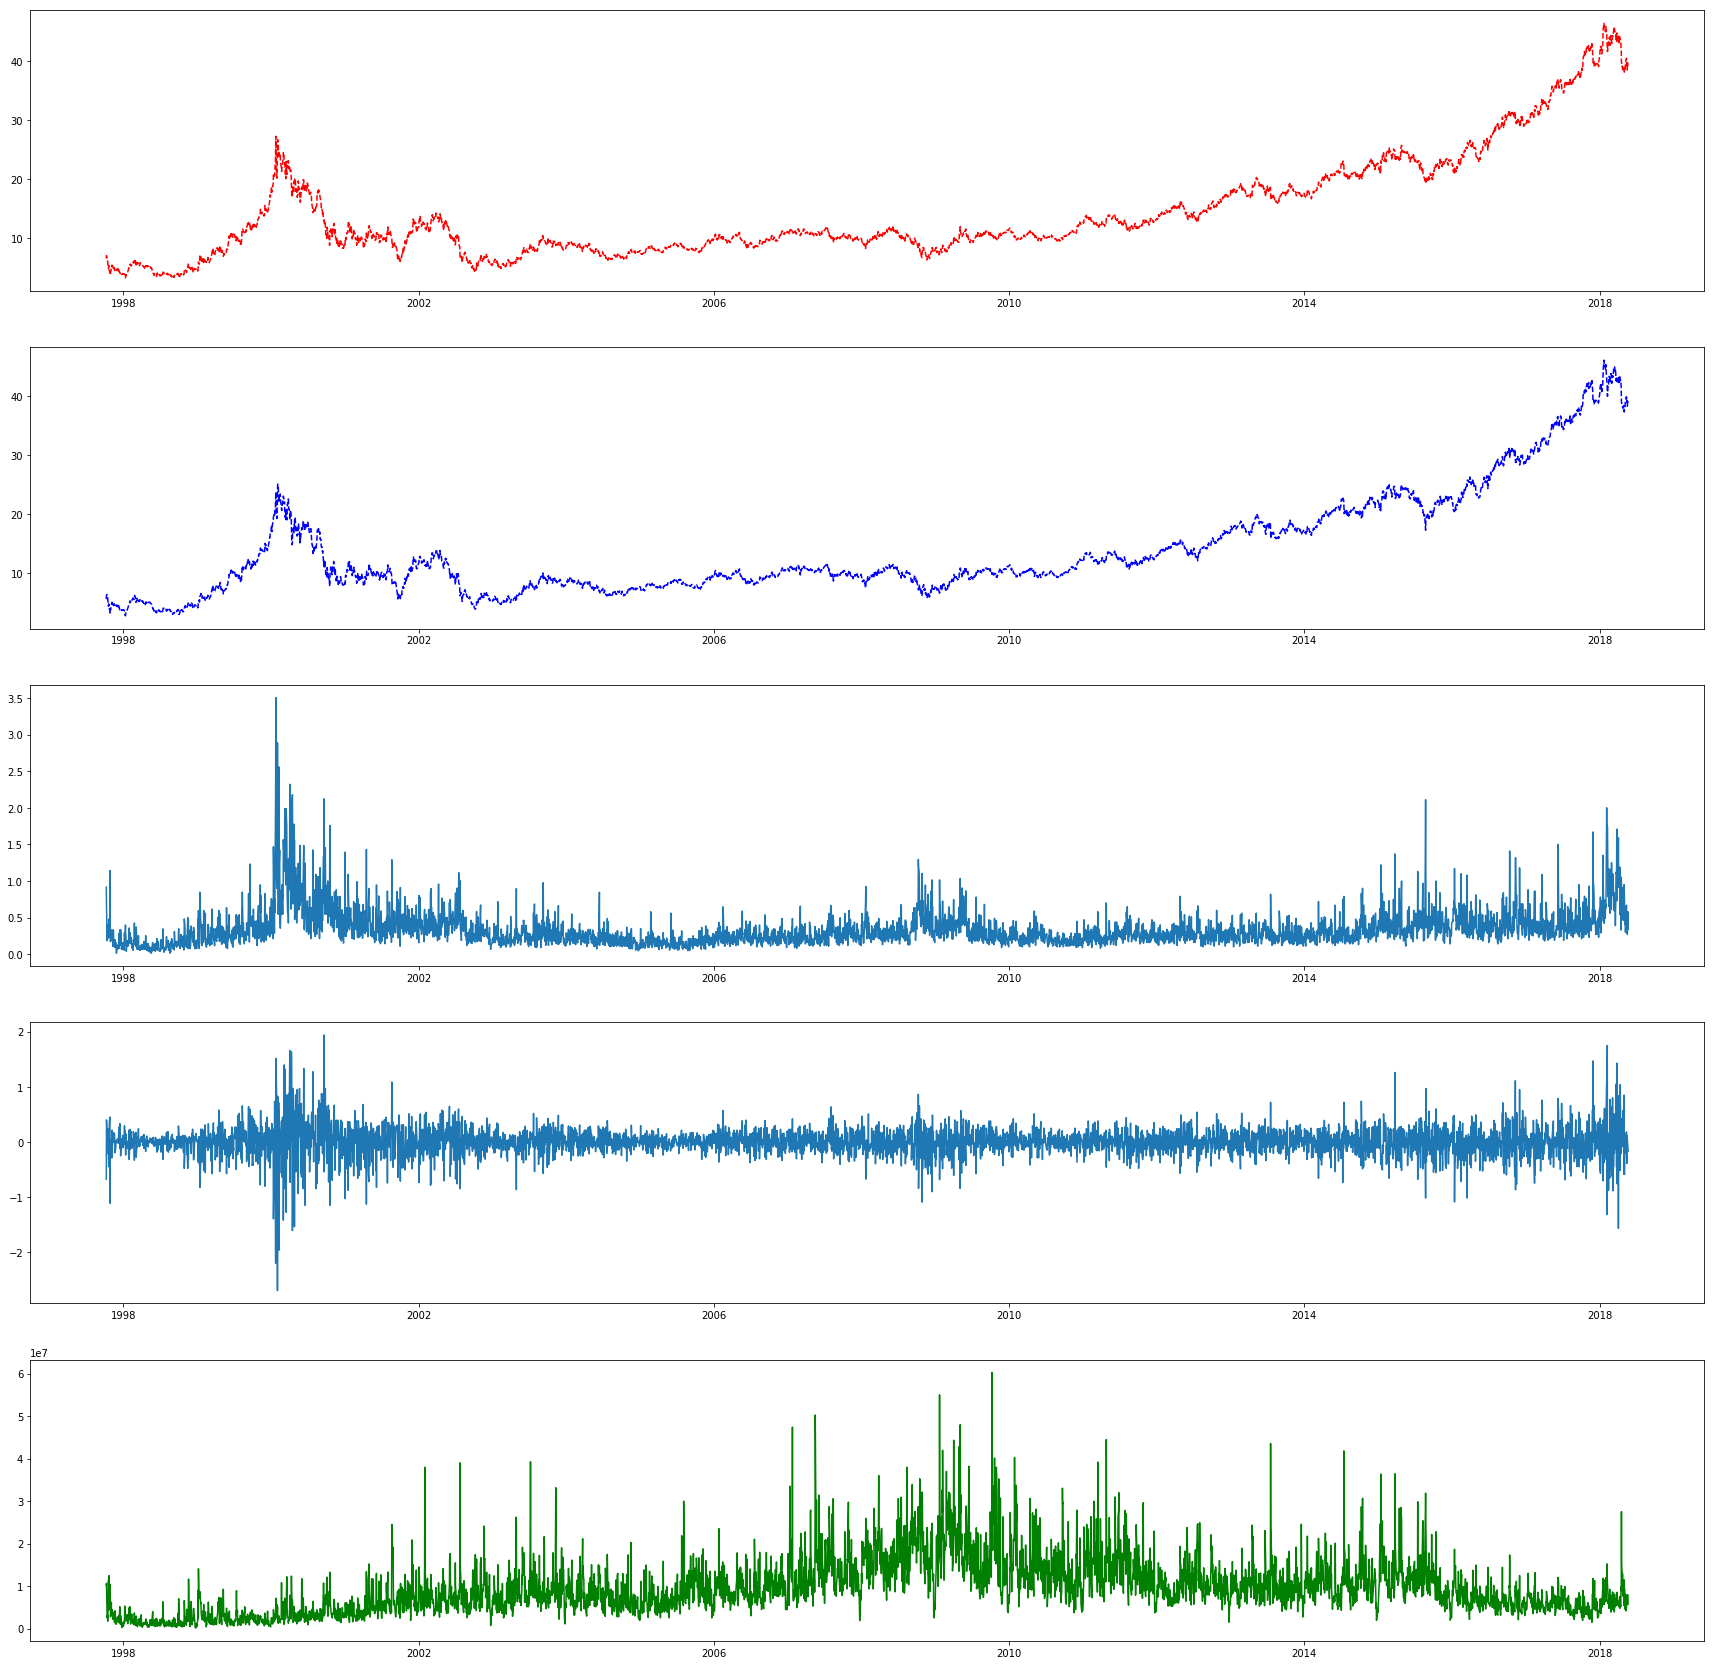

In [23]:
#plt.plot_date(shit['Date'], shit['Open'])
%pylab inline
pylab.rcParams['figure.figsize'] = (30, 30)



plt.close()

plt.figure(1)
plt.subplot(511)
plt.plot_date(shit['DateTime'], shit['High'], 'r--')

plt.subplot(512)
plt.plot_date(shit['DateTime'], shit['Low'], 'b--')

plt.subplot(513)
plt.plot_date(shit['DateTime'], (shit['High'] - shit['Low']), '-')

plt.subplot(514)
plt.plot_date(shit['DateTime'], (shit['Open'] - shit['Close']), '-')

plt.subplot(515)
plt.plot_date(shit['DateTime'], shit['Volume'], 'g-')

plt.show()

Populating the interactive namespace from numpy and matplotlib


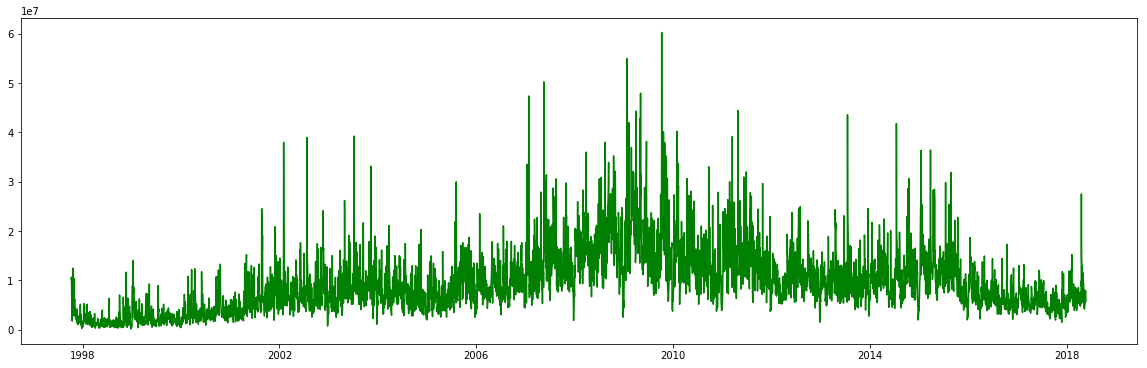

In [24]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)


plt.close()
plt.plot_date(shit['DateTime'], shit['Volume'], 'g-')
plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [15]:
from datetime import datetime




In [16]:
from scipy.interpolate import spline


shit['DateTime'] = pd.to_datetime(shit['Date'])

In [17]:
shit['DateTime'].resample('W', how='sum')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [18]:
#Smoothing by week/month

df = shit.set_index('DateTime').resample('M').sum()

In [44]:
shit = shit.set_index('DateTime')

In [59]:
shit.iloc[1000].index

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Toshiki\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


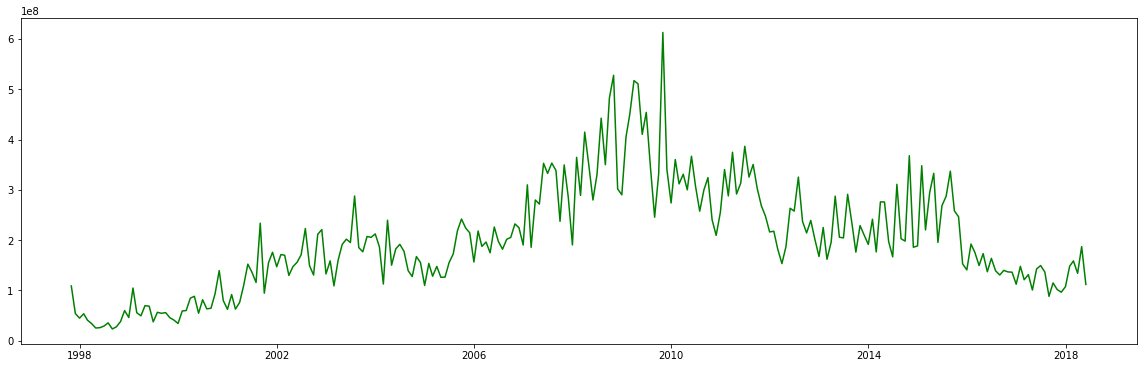

In [19]:
df.index

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)


plt.close()
plt.plot_date(df.index, df["Volume"], 'g-')
plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [148]:
for index, row in shit.head(1).iterrows():
    asdf = index
    for i in range(20):
        asdf += datetime.timedelta(days=1)
    print(shit.loc[index]["Low"])

5.64604


In [75]:
shit.index

DatetimeIndex(['1997-10-09', '1997-10-10', '1997-10-13', '1997-10-14',
               '1997-10-15', '1997-10-16', '1997-10-17', '1997-10-20',
               '1997-10-21', '1997-10-22',
               ...
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-14',
               '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-21', '2018-05-22'],
              dtype='datetime64[ns]', name='DateTime', length=5188, freq=None)

In [156]:
#causal filter
def cfilter(df, interval, attr):
    """Pass in a pandas dataframe, a number of days, and column name
    and get back a dataframe with a mean value causal filter applied to each row over each interval"""
    indeces = df.index
    return_dict = {} #smoothed dataset
    for index, row in df.iterrows():
        date_min = index - datetime.timedelta(days=interval + 1)
        date_current = index
        datesum = 0           #stores sum of values in interval
        dateind = 0           #stores number of valid dates per interval
        while date_min != date_current:
            date_min += datetime.timedelta(days=1)
            #check if date exists in dataset
            if date_min in indeces:
                dateind += 1
                datesum += df.loc[date_min][attr]
        
        #if there are no attributes within the cutoff date, just add current index
        if dateind == 0:
            return_dict[date_current] = row[attr]
        else:
            return_dict[date_current] = datesum/dateind
        
    return return_dict
            
            
            
        

In [161]:
x = cfilter(shit, 30, "Low")

In [162]:
xd = pd.DataFrame.from_dict(x, orient='index')

In [163]:
xd.columns = ['Low']

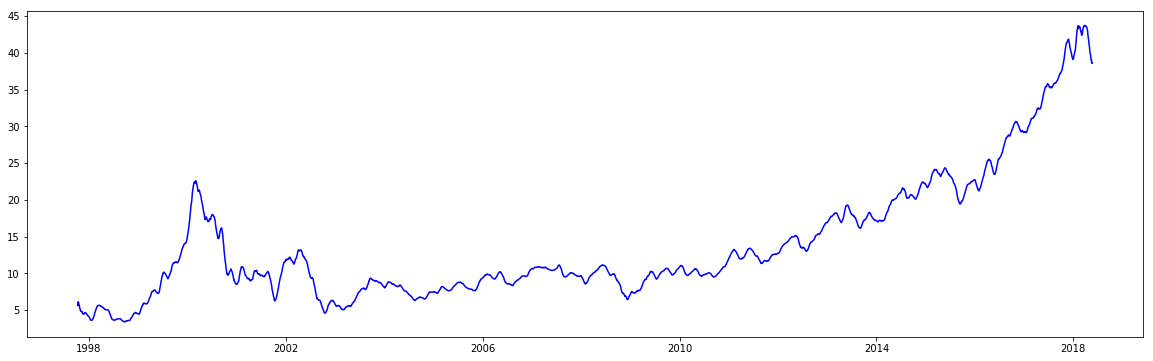

In [164]:
plt.close()
plt.plot_date(xd.index, xd["Low"], 'b-')
plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

In [169]:
#output dataset is same length as original
len(xd) == len(shit)

True